# Circuito de teleportacion cuantica en Qiskit
Recordemos que la idea de la teleportacion cuantica es que tenemos un emisor de informacion (Alice), que tiene un cubit en un estado arbitrario:

$
|\Psi> = \alpha |0> + \beta |1>
$

y desea enviar dos bits de informacion el recipiente (Bob).

In [3]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute

In [4]:
q =  QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)
# Ahora tenemos 3 cubis, el primero q0 representa el estado desconocido, el segundo y tercero q1 y q2 son los cubits
# entrelazados de Alice y Bob

In [5]:
# Ahora vamos a preparar el primer cubit (0) en un estado desconocido para Alice y Bob. Aplicamos dos operadores unitarios, 
# la compuerta de NOT y la compuerta de Z:
qc.x(0)
qc.z(0)
qc.barrier()
# Al final, añadimos una barrera, que es simplemente una herramienta visual para separar esta parte del circuito del resto

In [6]:
# El siguiente paso, es entrelazar los cubits de Alice y Bob el 1 y el 2, aplicando una compuerta de Hadamard al cubit de Alic,
# seguido de una compuerta de tipo CNOT entre los dos cubits (1 y 2).
qc.h(1)
qc.cx(1,2)
qc.barrier()

In [7]:
# Ahora, vamos a entrelazar el cubit de Alice (que a su vez esta entrelazado con el cubit de Bob) con el cubit |Psi>,
# y despues aplicamos una compuerta de Hadamard antes de medir el estado |Psi> y los cubits entrelazados:
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.cx(1,2)
qc.barrier()

In [8]:
# Despues  de medir los cubits |Psi> y q1, Alice le llama a Bob y le comunica los resultados de su medicion.
# Entonces Bob aplica las compuertas necesarias basandose en estos resultados. Y la idea de aplicar estas compuertas, 
# es que si recuerdan de las clases anteriores, hablabamos de que las compuertas cuanticas tienen la propiedad de ser 
# reversibles, y por lo tanto, debemos recuperar el estado |Psi> durante su preparacion, en orden reverso para recuperar
# el estado original.
qc.z(2)
qc.x(2)

In [9]:
# Ahora, como podemos comprobar que nuestros resultados son correctos?
# Aplicando una medicion en el estado de Bob, y si todo funciono, lo vamos a encontrar en el estado |0>
qc.measure(2,2)

In [18]:
import pylatexenc
qc.draw()

┌───┐┌───┐ ░            ░      ┌───┐┌─┐ ░       ░              
q0_0: ┤ X ├┤ Z ├─░────────────░───■──┤ H ├┤M├─░───────░──────────────
      └───┘└───┘ ░ ┌───┐      ░ ┌─┴─┐└┬─┬┘└╥┘ ░       ░              
q0_1: ───────────░─┤ H ├──■───░─┤ X ├─┤M├──╫──░───■───░──────────────
                 ░ └───┘┌─┴─┐ ░ └───┘ └╥┘  ║  ░ ┌─┴─┐ ░ ┌───┐┌───┐┌─┐
q0_2: ───────────░──────┤ X ├─░────────╫───╫──░─┤ X ├─░─┤ Z ├┤ X ├┤M├
                 ░      └───┘ ░        ║   ║  ░ └───┘ ░ └───┘└───┘└╥┘
c0: 3/═════════════════════════════════╩═══╩═══════════════════════╩═
                                       1   0                       2

Entonces recapitulando acerca de nuestro circuito de teleportacion,

- Bob recupera el estado que Alice envia, |Psi>. Es importante aqui recalcar que por el Teorema de no Clonacion, no podemos copiar un estado cuantico, lo que necesitamos hacer es manipular la informacion contenida en dicho estado, mediante compuertas cuanticas y cubits.
- Las barreras aqui representan varias estapas de este proceso:
(1) En el segmento 1, Alice prepara el cubit que desea enviar a Bob,
(2) En el segundo segmento, los cubits 1 y 2 son entrelazados.
(3) En el tercer segmento, Alice entrelaza su cubit entrelazado q1 con el cubit del estado que desea enviar (q0). Luego hace una medicion en estos dos cubits (q0 y q1).
(4) En el ultimo segmento, Bob recibe esta informacion y la codifica en su cubit mediante las compuertas Z y X, que son aplicadas en orden invertido a como Alice preparo el estado |Psi> en el primer segmento.
- Si todo funciono, la medicion de Bob siempre debe ser 0, porque es el estado inicial en el que se encontraba el cubit q0.

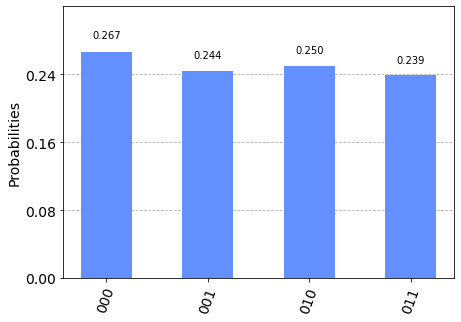

In [19]:
# Ahora podeos confirmar qur nuestro circuito funciona, corriendo nuestro circuito:

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 1024)
job_result = job.result()
results = job_result.get_counts(qc)
plot_histogram(results)

Y asi confirmamos, que efectivamente, Bob recupera el estado que Alice prepara, porque con 100% de probabilidad, el cubit q0, lo observamos en el estado 0, independientemente de en que estado observamos los cubits q1 y q2.